In [14]:
import pandas as pd
from string import punctuation
import re
import numpy as np
from setup import *
import glob
import os
import pickle
import joblib
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.corpus import stopwords

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD

import hypertools as hyp
import seaborn as sb
from scipy.linalg import toeplitz
from copy import copy

%matplotlib inline

keep_reach = 50


In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# The Process

## [I. Data Acquisition](#data_acquisition_link)

## [II. Preprocessing](#preprocessing_link)

## [III. The Model](#model_link)
1. [Grid Search](#grid_search_link)
1. [Cross Validate](#cv_link)
1. [Save the best with Pickle](#pickle_link)


<a id='data_acquisition_link'></a>
# Data Acquisition
1. Check if Files have been collected already
1. Use Glob to collect all of the files in the Data Folder
1. Save to single file for later use

In [2]:
overwrite_all_files = False


if os.path.isfile('All_Files.csv') and overwrite_all_files is False:
    print('Using old dataframe')
    df = pd.read_csv('All_Files.csv')

else:
    print('Making new dataframe')
    file_list = glob.glob("./data/Facebook Insights*")

    df_list = []

    for file in file_list:
        df_list.append(pd.read_csv(file,encoding='iso-8859-1').loc[1:])

    df = pd.concat(df_list).reset_index()
    df.to_csv('All_Files.csv')
display(df)

Using old dataframe


,Unnamed: 0,index,Post ID,Permalink,Post Message,Type,Countries,Languages,Posted,Audience Targeting,...,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,0,1,171162119680585_859052127558244,https://www.facebook.com/TarletonCOGS/posts/85...,Tomorrow is the COGS fall open house at Tarlet...,Link,nan,nan,9/30/16 4:26 PM,,...,0,0,0,0,0,0,0,0,0,0
1,1,2,171162119680585_859037424226381,https://www.facebook.com/TarletonCOGS/posts/85...,It's not too late to register for Saturday's O...,Link,nan,nan,9/29/16 4:11 PM,,...,0,0,0,0,0,0,0,0,0,0
2,2,3,171162119680585_859081790888611,https://www.facebook.com/TarletonCOGS/posts/85...,Tarleton's Fall Job Fair is being held October...,Link,nan,nan,9/29/16 6:19 AM,,...,0,0,0,0,0,0,0,0,0,0
3,3,4,171162119680585_859035847559872,https://www.facebook.com/TarletonCOGS/posts/85...,Questions about the #GRE? Attend this Saturda...,Link,nan,nan,9/28/16 4:07 PM,,...,0,0,0,0,0,0,0,0,0,0
4,4,5,171162119680585_859091770887613,https://www.facebook.com/TarletonCOGS/posts/85...,The deadline to register for the #TAMUSPathway...,Link,nan,nan,9/28/16 9:40 AM,,...,0,0,0,0,0,0,0,0,0,0
5,5,6,171162119680585_859074730889317,https://www.facebook.com/TarletonCOGS/posts/85...,Access the services of The Writing Center at ...,Link,nan,nan,9/28/16 6:02 AM,,...,0,0,0,0,0,0,0,0,0,0
6,6,7,171162119680585_859035654226558,https://www.facebook.com/TarletonCOGS/posts/85...,Learn more about graduate programs at Tarleton...,Link,nan,nan,9/27/16 4:07 PM,,...,0,0,0,0,0,0,0,0,0,0
7,7,8,171162119680585_859058130890977,https://www.facebook.com/TarletonCOGS/posts/85...,Looking to further your career as an education...,Photo,nan,nan,9/27/16 6:43 AM,,...,0,0,0,0,0,0,0,0,0,0
8,8,9,171162119680585_859028140893976,https://www.facebook.com/TarletonCOGS/posts/85...,Did you miss Tarleton on Tour on Saturday? Yo...,Link,nan,nan,9/26/16 4:53 PM,,...,0,0,0,0,0,0,0,0,0,0
9,9,10,171162119680585_859018744228249,https://www.facebook.com/TarletonCOGS/posts/85...,Thanks to all who came by the Arlington Conven...,Photo,nan,nan,9/26/16 7:17 AM,,...,0,0,0,0,0,0,0,0,0,0


<a id='preprocessing_link'></a>
# Preprocessing

1. Collect the columns for reach, engagement
1. Dropna, since they will not contribute to finding good posts
1. Create proportion column
1. Tokenize
1. Tf-Idf
1. Save the Tf-Idf using pickle
1. Condense the preprocessing step into a function ** TO DO STILL **


Use This next cell to restart the fresh df, to check changes in the preprocessing

In [5]:
overwrite = False

if os.path.isfile('vectorizer.pkl') and overwrite is False:
    print('Using old tokenized/scaled')
    df = pd.read_csv('All_Files.csv')
    X_all = pd.read_csv('all_X.csv',header=None, index_col = 0)[1]
    y_all = pd.read_csv('all_y.csv',header=None, index_col = 0,skiprows = 1)[1]
    
else:
    print('Creating new tokenized/scaled')
    df = pd.read_csv('All_Files.csv')
    df = df[['Post Message', 'Type', 'Posted', 'Lifetime Post Total Reach','Lifetime Engaged Users']]
    df.columns = ['Post', 'Type','Date','Reach','Engaged']
    df.dropna(inplace=True)
    df = pd.merge(df.groupby('Post')['Engaged'].apply(lambda p: max(p)).reset_index(),df[['Post', 'Type', 'Date', 'Reach', 'Engaged']], on = ['Post','Engaged'], how = 'inner')
    df.drop_duplicates('Post',inplace=True)
    df = df.loc[df['Reach']>=keep_reach].reset_index(drop=True)
    df['Prop'] = df['Engaged']/df['Reach']
    tokenized_df = df
    tokenized_df['Sentences'] = tokenized_df['Post'].transform(lambda x: sent_tokenize(str(x)))
    tokenized_df['Words'] = tokenized_df['Post'].transform(lambda x: ' '.join([WordNetLemmatizer().lemmatize(y.lower()) for y in word_tokenize(x) if y.isalpha()]))
    tokenized_df['Words'] = tokenized_df['Words'].transform(lambda x: ' '.join([y for y in word_tokenize(x) if y not in stopwords.words('english')]))
    tokenized_df = tokenized_df.loc[tokenized_df['Words'] != 'http']
    X_all = tokenized_df['Words']
    scaler = MinMaxScaler()
    scaler.fit(tokenized_df['Prop'].values.reshape(-1,1))
    y_all = scaler.transform(tokenized_df['Prop'].values.reshape(-1,1)).ravel()
    joblib.dump(scaler, 'minmax.pkl')
    X_all.to_csv('all_X.csv')
    pd.DataFrame(y_all).to_csv('all_y.csv') 

print('Done')


Creating new tokenized/scaled
Done


# Dimensionality reduction
### Previous attempts at the model provided bad results, so lets look at dimensionality reduction

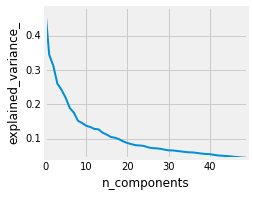

In [17]:

vectorizer = CountVectorizer(stop_words = stopwords.words('english'), encoding = 'iso-8859-1')
vectorizer.fit(X_all)

vect_X = vectorizer.transform(X_all)

pca = TruncatedSVD(n_components=50)

pca.fit(vect_X)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.show()


In [13]:
print(len(vectorizer.vocabulary_))

1720


<a id='model_link'></a>
<a id='grid_search_link'></a>
## Grid Search
1. First we need to setup a pipeline to Vectorize the posts (but only the training set)
1. Setup the grid search to run with pipeline
1. Find the best model from the grid search

<a id='grid_search_link'></a>
### Grid Search
We want to grid search over the tunable parameters of the SVR model.<br>
__Parameters__:<br>
__kernel__: linear, poly, rbf, sigmoid, or callable. This defines how the split will occur.<br>
__degree__: if polynomial then it is the degree of the polynomial for the split.<br>
__gamma__: kernel coefficient for rbf, poly and sigmoid. must be float or auto. If auto, then 1/n features will be used.<br>
__coef0__: The independent term of the kernel function. Only used in poly and sigmoid.<br>

In [29]:
sig_pipe = Pipeline([('tfidf',TfidfVectorizer()),('lsa',TruncatedSVD(n_components=400)),('svr', SVR(kernel = 'sigmoid'))])

sig_parameters = {'tfidf__ngram_range':((1,1),(1,2)),\
                 'svr__C':(1,10,100,1000), 'svr__gamma': (0.001,0.0001), 'svr__coef0':(0.0,0.1,0.25,0.5,1.0,2.0,4.0)}
#'tfidf__min_df':(0.01,0.02,0.05,0.1,0.15),'tfidf__max_df':(0.4, 0.5,0.65,0.85,1.0), 'tfidf__max_features': (None, 50, 100,250)

sig_grid = GridSearchCV(sig_pipe, sig_parameters, verbose = 1, cv=5, n_jobs = -1)
print(X_all.shape, y_all.shape)
sig_grid.fit(X_all, y_all)
joblib.dump(sig_grid.best_estimator_, 'best_grid.pkl')
print(sig_grid.best_score_)
print(sig_grid.best_params_)

(779,) (779,)
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.1min finished


0.0245558058112
{'svr__C': 10, 'svr__coef0': 0.25, 'svr__gamma': 0.001}


In [25]:
current_best = sig_grid.best_estimator_

In [28]:
current_best

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...silon=0.1, gamma=0.001,
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [5]:

poly_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svr', SVR(kernel = 'poly'))])
poly_parameters = {'tfidf__min_df':(0.01,0.02,0.05,0.1,0.15),'tfidf__max_df':(0.4, 0.5,0.65,0.85,1.0),'tfidf__ngram_range':((1,1),(1,2),(1,3),(1,4)),\
              'tfidf__max_features': (None, 50, 100,250),'svr__coef0':(0.0,0.1,0.25,0.5,1.0,2.0,5.0), 'svr__C':(1,10,100,1000), 'svr__gamma': (0.001,0.0001), 'svr__degree':(3,4,5)}


poly_grid = GridSearchCV(poly_pipe, poly_parameters, verbose = 1, cv=5, n_jobs = -1)
poly_grid.fit(X_all, y_all)

print(poly_grid.best_score_)
print(poly_grid.best_params_)
joblib.dump(poly_grid.best_estimator_, 'poly_grid.pkl')

Fitting 5 folds for each of 67200 candidates, totalling 336000 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9688 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12688 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 16088 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 19888 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 24088 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 28688 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 33688 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 39088 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 44888 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 51088 tasks      | el

0.0962082580346
{'svr__C': 1000, 'svr__coef0': 0.25, 'svr__degree': 4, 'svr__gamma': 0.001, 'tfidf__max_df': 0.4, 'tfidf__max_features': None, 'tfidf__min_df': 0.02, 'tfidf__ngram_range': (1, 1)}


In [8]:
joblib.dump(poly_grid.best_estimator_, 'poly_grid.pkl')

['poly_grid.pkl']

In [31]:
rbf_pipe = Pipeline([('tfidf',TfidfVectorizer()),('lsa',TruncatedSVD()),('svr', SVR(kernel = 'sigmoid'))])

rbf_parameters = {'tfidf__ngram_range':((1,1),(1,2)), 'lsa__n_components':(25,50,100,200),\
                 'svr__C':(1,10,100,1000), 'svr__gamma': (0.001,0.0001)}
#'tfidf__min_df':(0.01,0.02,0.05,0.1,0.15),'tfidf__max_df':(0.4, 0.5,0.65,0.85,1.0), 'tfidf__max_features': (None, 50, 100,250)

rbf_grid = GridSearchCV(rbf_pipe, rbf_parameters, verbose = 1, cv=5, n_jobs = -1)
rbf_grid.fit(X_all, y_all)
joblib.dump(rbf_grid.best_estimator_, 'rbf_grid.pkl')
print(rbf_grid.best_score_)
print(rbf_grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 10.1min finished


0.0841436532146
{'lsa__n_components': 100, 'svr__C': 100, 'svr__gamma': 0.001, 'tfidf__ngram_range': (1, 1)}


In [11]:
joblib.dump(rbf_grid.best_estimator_, 'rbf_grid.pkl')

['rbf_grid.pkl']

In [184]:
from sklearn.metrics import mean_absolute_error
model= sig_grid.best_estimator_

best_of_best = []
models = [sig_grid.best_estimator_,poly_grid.best_estimator_,rbf_grid.best_estimator_]


depth = 2000

for x in models:
    best = 1
    run = 0
    for y in range(depth):
        X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3)
        x.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        run+=mean_absolute_error(y_pred,y_test)
        if mean_absolute_error(y_pred,y_test) < best:
            best = mean_absolute_error(y_pred,y_test)
    best_of_best.append([run/depth,best])


for x in best_of_best:
    print(x[0],x[1])




0.08233926369898034 0.07036004506226383
0.07942311527147757 0.06754033707813559
0.07922323968385168 0.06541807283992555
